### MNIST with CNN

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

W0618 22:07:20.380369 140433575167872 deprecation.py:323] From <ipython-input-3-319879c4c296>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0618 22:07:20.382780 140433575167872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0618 22:07:20.385646 140433575167872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0618 22:07:20.628150 140433575167872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0618 22:07:20.630812 140433575167872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0618 22:07:20.681027 140433575167872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Helper Functions

Functions to help initialize random weights for convolutional or fully connected layers

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [0]:
def init_bias(shape):
    init_bias_vals = tf.truncated_normal(shape, stddev=0.2)
    #init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [0]:
def conv2d(x, w): #w is the filter, strides = [image, height, width, channel]
    return tf.nn.conv2d(x, w, strides = [1, 1, 1, 1], padding='SAME') #'SAME': padding with 0; 'VALID': no padding

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
def convolutional_layer(input_x, shape):
    w = init_weights(shape)
    b = init_bias(shape[3:4]) #must be a shape, not just integer. for all filters
    return tf.nn.relu(conv2d(input_x, w)+b)

In [0]:
def normal_full_layer(input_layer, size): #size: num_of_neurons
    input_size = int(input_layer.get_shape()[1])
    w = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, w)+b

### Placeholder

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 28*28])
y_true = tf.placeholder(tf.float32, shape=[None, 10]) #for each value, 10-digit one-hot encoded

In [0]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [0]:
convo_1 = convolutional_layer(x_image, shape = (6, 6, 1, 32)) #filter shape #
convo_1_pooling = max_pool_2by2(convo_1)

In [0]:
convo_2 = convolutional_layer(convo_1_pooling, shape = [6, 6, 32, 64]) #filter shape #
convo_2_pooling = max_pool_2by2(convo_2)


In [0]:
convo_2_flat = tf.reshape(convo_2_pooling, [-1, 7*7*64])

In [0]:
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1024))

In [16]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)


W0618 22:07:21.130257 140433575167872 deprecation.py:506] From <ipython-input-16-9ba37e570df2>:2: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
y_pred = normal_full_layer(full_one_dropout, 10)

### Loss Function

In [18]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

W0618 22:07:21.172116 140433575167872 deprecation.py:323] From <ipython-input-18-de34d8b053ce>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Optimizer 

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

### Session

In [0]:
init = tf.global_variables_initializer()

In [0]:
steps = 5000
ACC = []
LOSS = []
with tf.Session() as sess:
  sess.run(init)
  for i in range(steps):
    #sess.run(init) #don't put it here. Disaster!!!
    batch_x, batch_y = mnist.train.next_batch(50)
    sess.run(train, {x:batch_x, y_true: batch_y, hold_prob: 0.5})
    
    if i % 100 == 0:
        matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
        acc = tf.reduce_mean(tf.cast(matches, tf.float32))
        ACC.append(sess.run(acc, {x: mnist.test.images, y_true: mnist.test.labels, hold_prob: 1.0}))
        #print (i, ACC[-1])
        LOSS.append(sess.run(cross_entropy, {x: mnist.test.images, y_true: mnist.test.labels, hold_prob: 1.0}))
        

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

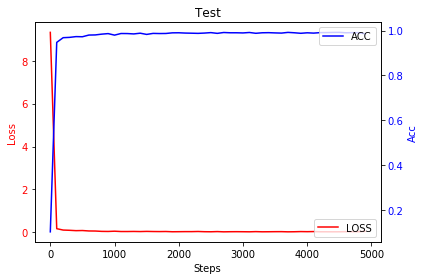

In [27]:
fig, ax1 = plt.subplots()
plt.title('Test')

ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss', color = 'r')
ax1.tick_params(axis='y', labelcolor = 'r')
ax1.plot(range(0, 5000, 100), LOSS, 'r', label = 'LOSS')
#ax1.legend()
ax1.legend(loc = 'lower right')

ax2 = ax1.twinx()
ax2.set_ylabel('Acc', color = 'b')
ax2.tick_params(axis = 'y', labelcolor = 'b')
ax2.plot(range(0, 5000, 100), ACC, 'b', label = 'ACC')
ax2.legend(loc = 'upper right')

fig.tight_layout()